# WeRateDogs Twitter Data Wrangling & Analysis

*by Awurigwe Joseph*

## Table of Contents

- <a href='#intro'>Introduction</a>
- <a href='#gather'>Gather</a>
- <a href='#assess'>Assess</a>
- <a href='#clean'>Clean</a>
- <a href='#store'>Store</a>
- <a href='#analysis'>Exploratory Data Analysis</a>
- <a href='#conclusion'>Conclusion</a>
- <a href='#sources'>Sources</a>

I'll start the data wrangling by importing the packages to be used in the project

In [83]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#changing the max column width for the display
pd.set_option('display.max_colwidth', None)

# Gathering

The first file is the 'twitter-archive-enhanced.csv' which was downloaded manually from udacity servers

In [84]:
tweet_archive = pd.read_csv('../input/twitter-archive/twitter-archive-enhanced.csv')

#confirming success by checking head()
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


The second dataset, the image prediction(image_prediction.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library

In [85]:
# image predictions URL provided by Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_pred = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(image_pred.content)

In [86]:
#reading the downloaded image prediction file to a dataframe
predictions = pd.read_csv('./image-predictions.tsv', sep='\t')

#confirming success with .head()
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The 'tweets-json.txt' was meant to be gotten by querying the twitter api but I couldn't get access to it, so I had to downnload the one already given in the classroom

In [87]:
#sorting through the tweets-json file
df_list = []
with open('../input/twitter-archive/tweets-json.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
#reading the json into a dataframe
tweet_data = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

# Accessing The Data

The next step involves accessing the gathered data, which will be done both visually and programatically

In [88]:
#Twitter Archive
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [89]:
#Image Predictions
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [90]:
#Tweets data generated via tweepy
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


Programmatic Assessment

In [91]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [92]:
tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [93]:
tweet_archive.expanded_urls.duplicated().value_counts()

False    2219
True      137
Name: expanded_urls, dtype: int64

In [94]:
tweet_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [95]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [96]:
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [97]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [98]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Observations
### Quality issues

1. The Timestamp column should be of the datetime format
2. Irrelevant Categories that needs to be dropped('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_stamps_user_id', 'retweeted_status_timestamps')
3. Incorrect Data in the name columns(no way a dog is named 'a')
4. Source data column needs to be cleaned to extract just the url
5. Repeated Values in the 'expanded_url' column
6. Some Values in the 'denominator' column not equal to 10
7. Some Values in the 'numerator' column equal to 0
8. Inconsistent Naming in the 'p1','p2' and 'p3' columns in the prediction dataframe
9. Consistent names and logical order to column data as final step in cleaning

### Tidyness Issues

1. there are 4 columns for doggo, floffer, pupper, and puppo in the "twitter_archive_df" but this is same categorical data that would be better in only 1 column.
2. there are 3 dataframes, The data we require should fit into a single dataframe.


# Cleaning The Data

As it with any cleaning process, we start with making a copy of the datasets to be cleaned.

In [99]:
#creating copies of the original dataframes
tweet_archive_clean = tweet_archive.copy()
predictions_clean = predictions.copy()
tweet_data_clean = tweet_data.copy()

In [100]:
#saving the created copies to csv
tweet_archive_clean.to_csv('tweet_archive_clean.csv', index=False)
predictions_clean.to_csv('predictions_clean.csv', index=False)
tweet_data_clean.to_csv('tweet_data_clean.csv', index=False)

## 1. Merge all dataframes into 1

In [101]:
#Merging all dataframes into one, we add them one after the other
archive_tweet_data = pd.merge(tweet_archive_clean, tweet_data_clean, on=['tweet_id', 'tweet_id'], how='left')

In [102]:
#verifying merge success
archive_tweet_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,9774.0,41048.0


In [103]:
archive_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [104]:
#Second Merge, merging the product of the first mere with the predictions dataframe
twitter_archive_master = pd.merge(archive_tweet_data, predictions_clean, on='tweet_id', how='left')

In [105]:
#Confirm Merge Success
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [106]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [107]:
#saving merged to csv
twitter_archive_master.to_csv('twitter_archive_merged.csv', index=False)

## 2. Remove retweets and replies

There are 181 retweets which are present in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp". we will remove the rows containing the retweets and leave the rest

In [108]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.retweeted_status_id.isnull()]

In [109]:
#checking new contents
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [110]:
#since the retweets are gone, we can now deleted related columns from the dataframe
twitter_archive_master.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [111]:
#verifying drop worked
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  retweet_count          2175 non-null   float64
 15  favo

We'll repeat the above for the replies

In [112]:
#dropping rows with values in the replies
twitter_archive_master = twitter_archive_master[twitter_archive_master.in_reply_to_status_id.isnull()]

In [113]:
#checking if the replies are gone
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   2097 non-null   object 
 10  doggo                  2097 non-null   object 
 11  floofer                2097 non-null   object 
 12  pupper                 2097 non-null   object 
 13  puppo                  2097 non-null   object 
 14  retweet_count          2097 non-null   float64
 15  favo

In [114]:
#now we can drop the columns for the replies
twitter_archive_master.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)
#checking if the replies columns are gone
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  retweet_count       2097 non-null   float64
 13  favorite_count      2097 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

## 3. Melting the dog stages into one column

In [115]:
melted_archive = pd.melt(twitter_archive_master, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [116]:
#checking the content of the new melted dataframe
melted_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            8388 non-null   int64  
 1   timestamp           8388 non-null   object 
 2   source              8388 non-null   object 
 3   text                8388 non-null   object 
 4   expanded_urls       8376 non-null   object 
 5   rating_numerator    8388 non-null   int64  
 6   rating_denominator  8388 non-null   int64  
 7   name                8388 non-null   object 
 8   favorite_count      8388 non-null   float64
 9   retweet_count       8388 non-null   float64
 10  jpg_url             7884 non-null   object 
 11  img_num             7884 non-null   float64
 12  p1                  7884 non-null   object 
 13  p1_conf             7884 non-null   float64
 14  p1_dog              7884 non-null   object 
 15  p2                  7884 non-null   object 
 16  p2_con

In [117]:
melted_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,39467.0,8853.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,33819.0,6514.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,25461.0,4328.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,42908.0,8964.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,41048.0,9774.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None


In [118]:
# Sort the dataframe by dog type so that we can drop the 3 duplicates that don't contain a dog type.
melted_archive = melted_archive.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [119]:
#verify that the drop worked
melted_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   favorite_count      2097 non-null   float64
 9   retweet_count       2097 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

In [120]:
#dropping the 'types' column
melted_archive.drop(columns ='types', inplace=True)
melted_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   favorite_count      2097 non-null   float64
 9   retweet_count       2097 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

## 4. Coverting the 'timestamp' column to datetime

In [121]:
melted_archive.timestamp

2021    2015-11-19 18:13:27 +0000
2020    2015-11-19 20:14:03 +0000
2019    2015-11-19 20:20:22 +0000
2018    2015-11-19 20:44:47 +0000
2017    2015-11-19 21:22:56 +0000
                  ...            
6303    2017-07-25 01:55:32 +0000
6305    2017-07-24 17:02:04 +0000
6374    2017-06-11 21:18:31 +0000
6779    2016-10-31 21:00:23 +0000
6856    2016-09-28 00:46:20 +0000
Name: timestamp, Length: 2097, dtype: object

In [122]:
#we need to remove the trailing zeros before we convert it to a datetime format and we do that using the strip method
melted_archive.timestamp = melted_archive.timestamp.str.strip('+0000')

In [123]:
#converting to datetime
melted_archive.timestamp = pd.to_datetime(melted_archive.timestamp)

In [124]:
#verifying changes
melted_archive.info()
melted_archive.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   favorite_count      2097 non-null   float64       
 9   retweet_count       2097 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  img_num             1971 non-null   float64       
 12  p1                  1971 non-null   object        
 13  p1_conf             1971 non-null   float64  

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
2021,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,489.0,234.0,...,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None
2020,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,326.0,89.0,...,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None
2019,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,None,483.0,257.0,...,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,None
2018,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,None,833.0,620.0,...,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,None
2017,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,327.0,96.0,...,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,None


## 5. Incorrect Data in the name columns(no way a dog is named 'a')

In [125]:
melted_archive.name.value_counts()

None       603
a           55
Lucy        11
Charlie     11
Cooper      10
          ... 
Jaspers      1
Clarq        1
Ralf         1
Kirk         1
Stuart       1
Name: name, Length: 955, dtype: int64

In [126]:
#we have to change the 'a' to none so that it can tally with the rest of the dataframe
melted_archive.name.replace('a', 'None', inplace=True)
melted_archive.name.value_counts()

None        658
Lucy         11
Charlie      11
Oliver       10
Cooper       10
           ... 
Terrance      1
Jaspers       1
Clarq         1
Ralf          1
Stuart        1
Name: name, Length: 954, dtype: int64

In [127]:
#check Unique names with the .unique() method to try to figure any errant value
melted_archive.name.unique()

array(['Biden', 'None', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Fwed', 'Naphaniel', 'Kial', 'George', 'Olive', 'Calvin', 'Filup',
       'Frank', 'Genevieve', 'Joshwa', 'Lugan', 'Josep', 'Jockson',
       'Jeph', 'Carll', 'Klevin', 'Keet', 'Dave', 'Clybe', 'Gabe',
       'Pipsy', 'Bradlay', 'Churlie', 'Kenneth', 'Clarence', 'Timison',
       'Shaggy', 'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis',
       'Jiminy', 'Alfie', 'Skittles', 'Ron', 'Torque', 'Bisquick',
       'Jareld', 'Sophie', 'Christoper', 'Jimothy', 'Rusty', 'the', 'an',
       'quite', 'Walter', 'Scout', 'Kreggory', 'Phineas', 'Harry',
       'Monkey', 'Cash', 'Nugget', 'Goose', 'Venti', 'Benedict', 'Nelly',
       'Dante', 'Penny', 'Aja', 'Emmy', 'Jimbo', 'Waffles', 'Derek',
       'Mingus', 'Maya', 'Canela', 'such', 'Jeffrey', 'Gerald', 'Ralphus',
       'Zeke', 'Jim', 'Oliver', 'Ted', 'Bruno', 'Koda', 'Zoey', 'Jax',
       'Franklin', 'Darla', 'Archie', 'Tilly', 'Maisey', 'Shadow', 'Earl',
       '

I saw a lot of values that couldn't be names, these are also going to be replaced with 'None'


In [128]:
errants = ['the','an','quite','one', 'O', 'not', 'my', 'his', 'mad', 'very', 'unacceptable', 'this', 'such', 'space']
for x in errants:
    melted_archive.name.replace(x, 'None', inplace=True)
melted_archive.name.value_counts()

None       693
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Jaspers      1
Clarq        1
Ralf         1
Kirk         1
Stuart       1
Name: name, Length: 940, dtype: int64

In [129]:
melted_archive.name.value_counts()

None       693
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Jaspers      1
Clarq        1
Ralf         1
Kirk         1
Stuart       1
Name: name, Length: 940, dtype: int64

Having None as a name seems weird, let's change it to NaN cause it's a null value

In [130]:
melted_archive.name.replace("None", value= np.nan, inplace=True)

In [131]:
melted_archive.name.value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
           ..
Jaspers     1
Clarq       1
Ralf        1
Kirk        1
Stuart      1
Name: name, Length: 939, dtype: int64

## 6. Source data column needs to be cleaned to extract just the Tweet Source

In [132]:
melted_archive.source.sample(20)

3828    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2642                       <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
2514    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
741     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2200    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2253    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
5689    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3670    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2482    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3781    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2425    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [133]:
# Use re library with findall function and extract real source from tags
import regex as re

melted_archive['source'] = melted_archive['source'].apply(lambda x: re.findall(r'>(.*)</a>', x)[0])

In [134]:
melted_archive.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

## 7. Missing Values in the 'expanded_urls' column

The 'expanded_urls' is the column which contain the links for the images or videos, since we are only concerned about tweets with images, those rows without any value in the 'expanded_url' column would have to be dropped

In [135]:
melted_archive.expanded_urls.isnull().value_counts()

False    2094
True        3
Name: expanded_urls, dtype: int64

In [136]:
melted_archive.dropna(subset=['expanded_urls'], inplace=True)

In [137]:
#verifiying that the rows with missing values was dropped
melted_archive.expanded_urls.isnull().value_counts()

False    2094
Name: expanded_urls, dtype: int64

## 8. Some Values in the 'rating_denominator' column not equal to 10


In [138]:
melted_archive.rating_denominator.value_counts()

10     2077
50        3
11        2
80        2
2         1
40        1
110       1
90        1
20        1
120       1
7         1
70        1
170       1
150       1
Name: rating_denominator, dtype: int64

In [139]:
#investigating strange values
melted_archive.loc[lambda x:x['rating_denominator']== 11].text

3523     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
2950    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Name: text, dtype: object

From the text, the 7/11 and the 9/11 were errors while gathering, the real values are 10/10 and 14/10 respectively

In [140]:
melted_archive.at[3523, 'rating_denominator'] = 10
melted_archive.at[3523, 'rating_numerator'] = 10
melted_archive.at[2950, 'rating_denominator'] = 10
melted_archive.at[2950, 'rating_numerator'] = 14

In [141]:
#still investigating strange values
melted_archive.loc[lambda x:x['rating_denominator']== 2].text

2076    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

Still an error from the data gathering process

In [142]:
melted_archive.at[2076, 'rating_denominator'] = 10
melted_archive.at[2076, 'rating_numerator'] = 9

In [143]:
#still investigating strange values
melted_archive.loc[lambda x:x['rating_denominator']== 7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
2500,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,5927.0,1655.0,...,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,None


In [144]:
#This particular dog was not given any rating, so we're going to drop it
melted_archive.drop(index=2500, inplace=True)

## 9. Some Values in the 'rating_numerator' column equal to 0

In [145]:
melted_archive.rating_numerator.value_counts()

12      485
10      435
11      413
13      287
9       153
8        98
7        51
14       39
5        34
6        32
3        19
4        16
2         9
1         4
26        1
165       1
204       1
1776      1
0         1
84        1
75        1
88        1
80        1
144       1
420       1
60        1
50        1
45        1
99        1
121       1
44        1
27        1
Name: rating_numerator, dtype: int64

Interesting set of values, let's get digging

In [146]:
melted_archive.loc[lambda x:x['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
2343,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,NaN,24574.0,3443.0,...,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,None


I checked the tweet and it wasn't an actual rating of a dog, so dropping it

In [147]:
melted_archive.drop(index=2343, inplace=True)

We have some 1's and 2's, gonna check what could have caused it

In [148]:
melted_archive.loc[lambda x:x['rating_numerator'] == 1]
melted_archive.loc[lambda x:x['rating_numerator'] == 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
2051,666786068205871104,2015-11-18 01:12:41,Twitter for iPhone,Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,https://twitter.com/dog_rates/status/666786068205871104/photo/1,2,10,NaN,800.0,521.0,...,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False,None
1990,667878741721415682,2015-11-21 01:34:35,Twitter for iPhone,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,https://twitter.com/dog_rates/status/667878741721415682/photo/1,2,10,Tedrick,409.0,127.0,...,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True,None
1981,668142349051129856,2015-11-21 19:02:04,Twitter for iPhone,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2,https://twitter.com/dog_rates/status/668142349051129856/photo/1,2,10,NaN,592.0,306.0,...,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False,None
2067,666411507551481857,2015-11-17 00:24:19,Twitter for iPhone,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2,10,NaN,459.0,339.0,...,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False,None
2090,666051853826850816,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,NaN,1253.0,879.0,...,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,None
3923,670826280409919488,2015-11-29 04:47:03,Twitter for iPhone,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",https://twitter.com/dog_rates/status/670826280409919488/photo/1,2,10,NaN,5961.0,4485.0,...,scorpion,0.927956,False,tarantula,0.021631,False,wolf_spider,0.014837,False,None
3623,678424312106393600,2015-12-20 03:58:55,Twitter for iPhone,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,https://twitter.com/dog_rates/status/678424312106393600/photo/1,2,10,Crystal,5916.0,2880.0,...,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True,None
3620,678675843183484930,2015-12-20 20:38:24,Twitter for iPhone,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,https://twitter.com/dog_rates/status/678675843183484930/photo/1,2,10,NaN,3155.0,1680.0,...,maze,0.339850,False,streetcar,0.099688,False,sundial,0.084808,False,None
3767,674265582246694913,2015-12-08 16:33:36,Twitter for iPhone,This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,https://twitter.com/dog_rates/status/674265582246694913/photo/1,2,10,Henry,1766.0,936.0,...,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False,None


Seems like all the ratings are valid except from the ones fixed earlier

## 10. Inconsistent Naming in the 'p1','p2' and 'p3' columns in the prediction dataframe

In [149]:
melted_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 2021 to 6856
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2092 non-null   int64         
 1   timestamp           2092 non-null   datetime64[ns]
 2   source              2092 non-null   object        
 3   text                2092 non-null   object        
 4   expanded_urls       2092 non-null   object        
 5   rating_numerator    2092 non-null   int64         
 6   rating_denominator  2092 non-null   int64         
 7   name                1403 non-null   object        
 8   favorite_count      2092 non-null   float64       
 9   retweet_count       2092 non-null   float64       
 10  jpg_url             1969 non-null   object        
 11  img_num             1969 non-null   float64       
 12  p1                  1969 non-null   object        
 13  p1_conf             1969 non-null   float64  

In [150]:
melted_archive.iloc[:, 12:21].head()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2021,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True
2020,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
2019,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False
2018,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False
2017,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True


As we can see, the values in the p1, p2 and p3 columns are not consistent in their cases, we can fix that

In [151]:
#using the .title() method
melted_archive.p1 = melted_archive.p1.str.title()
melted_archive.p2 = melted_archive.p2.str.title()
melted_archive.p3 = melted_archive.p3.str.title()

In [152]:
#verifying changes
melted_archive.iloc[:, 12:21].sample(10)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
5553,Rottweiler,0.441331,True,Miniature_Pinscher,0.233180,True,Gordon_Setter,0.093582,True
2292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3281,Schipperke,0.667324,True,Chesapeake_Bay_Retriever,0.119550,True,Kelpie,0.097600,True
3062,Golden_Retriever,0.140394,True,Saint_Bernard,0.118769,True,Labrador_Retriever,0.075492,True
2260,German_Shepherd,0.509879,True,Malinois,0.237311,True,Kelpie,0.046916,True
5938,Great_Pyrenees,0.755945,True,Old_English_Sheepdog,0.082337,True,Afghan_Hound,0.027037,True
2960,Walker_Hound,0.640256,True,English_Foxhound,0.229799,True,Beagle,0.037754,True
3724,Golden_Retriever,0.949215,True,Labrador_Retriever,0.016765,True,Flat-Coated_Retriever,0.010637,True
3474,White_Wolf,0.318524,False,Dingo,0.215436,False,Collie,0.095805,True
2326,Great_Pyrenees,0.997692,True,Kuvasz,0.001001,True,Newfoundland,0.000405,True


## 11. Choosing the best prediction for the dog breed

there are 3 predictions for the dog breed in the "image_predictions_df" but maybe the best prediction will suffice to reduce the size of the final dataframe.

In [153]:
#lists to use to save our picks
breed = []
confidence = []

# a function that iterates through the dog breed predictions in order to determine the best forecast.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
melted_archive.apply(breed_confidence, axis=1)

# add lists created to master dataframe
melted_archive['breed'] = breed
melted_archive['confidence'] = confidence

# check the columns have been added
melted_archive.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence
2021,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,489.0,234.0,...,True,Leonberg,0.127998,True,Golden_Retriever,0.069357,True,None,Saint_Bernard,0.381377
2020,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,NaN,326.0,89.0,...,True,Miniature_Pinscher,0.000450,True,Black-And-Tan_Coonhound,0.000157,True,None,Rottweiler,0.999091


In [154]:
# we would be dropping the previous predictions columns since we have no further use for them
melted_archive.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1, inplace=True)

In [155]:
#verifying the dropped columns
melted_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 2021 to 6856
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2092 non-null   int64         
 1   timestamp           2092 non-null   datetime64[ns]
 2   source              2092 non-null   object        
 3   text                2092 non-null   object        
 4   expanded_urls       2092 non-null   object        
 5   rating_numerator    2092 non-null   int64         
 6   rating_denominator  2092 non-null   int64         
 7   name                1403 non-null   object        
 8   favorite_count      2092 non-null   float64       
 9   retweet_count       2092 non-null   float64       
 10  jpg_url             1969 non-null   object        
 11  dog_type            2092 non-null   object        
 12  breed               2092 non-null   object        
 13  confidence          2092 non-null   float64  

# Storing Data

In [156]:
#Saving the final data to a csv file
melted_archive.to_csv('twitter_archive_master.csv', index=False)

# Analyzing and Visualizing Data

In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

1. Most popular dog names
2. Most rated dog breed
3. relationship between favorite_count and retweet_count 

## 1. Most popular dog names

In [157]:
final_archive = pd.read_csv('./twitter_archive_master.csv')
final_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2092 non-null   int64  
 1   timestamp           2092 non-null   object 
 2   source              2092 non-null   object 
 3   text                2092 non-null   object 
 4   expanded_urls       2092 non-null   object 
 5   rating_numerator    2092 non-null   int64  
 6   rating_denominator  2092 non-null   int64  
 7   name                1403 non-null   object 
 8   favorite_count      2092 non-null   float64
 9   retweet_count       2092 non-null   float64
 10  jpg_url             1969 non-null   object 
 11  dog_type            2092 non-null   object 
 12  breed               2092 non-null   object 
 13  confidence          2092 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 228.9+ KB


In [158]:
dog_names = final_archive.query('name == name').groupby(['name']).count()[['tweet_id']]

In [159]:
dog_names.sort_values(by='tweet_id', ascending=False).head(10)

,tweet_id
name,
Lucy,11
Charlie,11
Oliver,10
Cooper,10
Tucker,9
Penny,9
Sadie,8
Winston,8
Lola,8


As we can see from the dataframe above, the 10 most popular dog names are, Lucy, Charlie, Oliver, Cooper, Tucker, Penny, Sadie, Winston, Lola and Daisy

## 2. Most rated dog breeds

We are going to get a rating percentage for the dogs by dividing the numerator by the denominator and converting the fractions to percentages

In [160]:
final_archive['rating_percent'] = final_archive.apply(lambda x: (x.rating_numerator / x.rating_denominator)*100, axis=1)

In [161]:
final_archive.rating_percent.sort_values(ascending=False)

1500    17760.0
674      4200.0
1257      750.0
2019      270.0
926       260.0
         ...   
670        20.0
18         10.0
657        10.0
1067       10.0
99         10.0
Name: rating_percent, Length: 2092, dtype: float64

In [162]:
#investigating the one with the highest rating
final_archive.iloc[674]

tweet_id                                                                               670842764863651840
timestamp                                                                             2015-11-29 05:52:33
source                                                                                 Twitter for iPhone
text                  After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
expanded_urls                             https://twitter.com/dog_rates/status/670842764863651840/photo/1
rating_numerator                                                                                      420
rating_denominator                                                                                     10
name                                                                                                  NaN
favorite_count                                                                                     7989.0
retweet_count                                 

In [164]:
top_10 = pd.DataFrame(final_archive.groupby('breed')['rating_percent'].mean()).sort_values(by= 'rating_percent', ascending=False).head(10)

In [168]:
top_10.reset_index(inplace=True)

In [169]:
top_10

,breed,rating_percent
0,Clumber,270.000000
1,Unknown,148.691589
2,Bouvier_Des_Flandres,130.000000
3,Pomeranian,125.365854
4,Saluki,125.000000
5,Briard,123.333333
6,Tibetan_Mastiff,122.500000
7,Border_Terrier,121.428571
8,Standard_Schnauzer,120.000000
9,Silky_Terrier,120.000000


In [182]:
from matplotlib import rcParams
import seaborn as sns
def Barplot(x_data,y_data,data,title,xlabel,ylabel):
    pl = sns.barplot(x = x_data,y = y_data,data = data,color = sns.color_palette('pastel')[0])
    pl.set_title(title,fontsize = 25)
    pl.set_xlabel(xlabel)
    pl.set_ylabel(ylabel)
    rcParams['figure.figsize'] = 20,20
    plt.show()

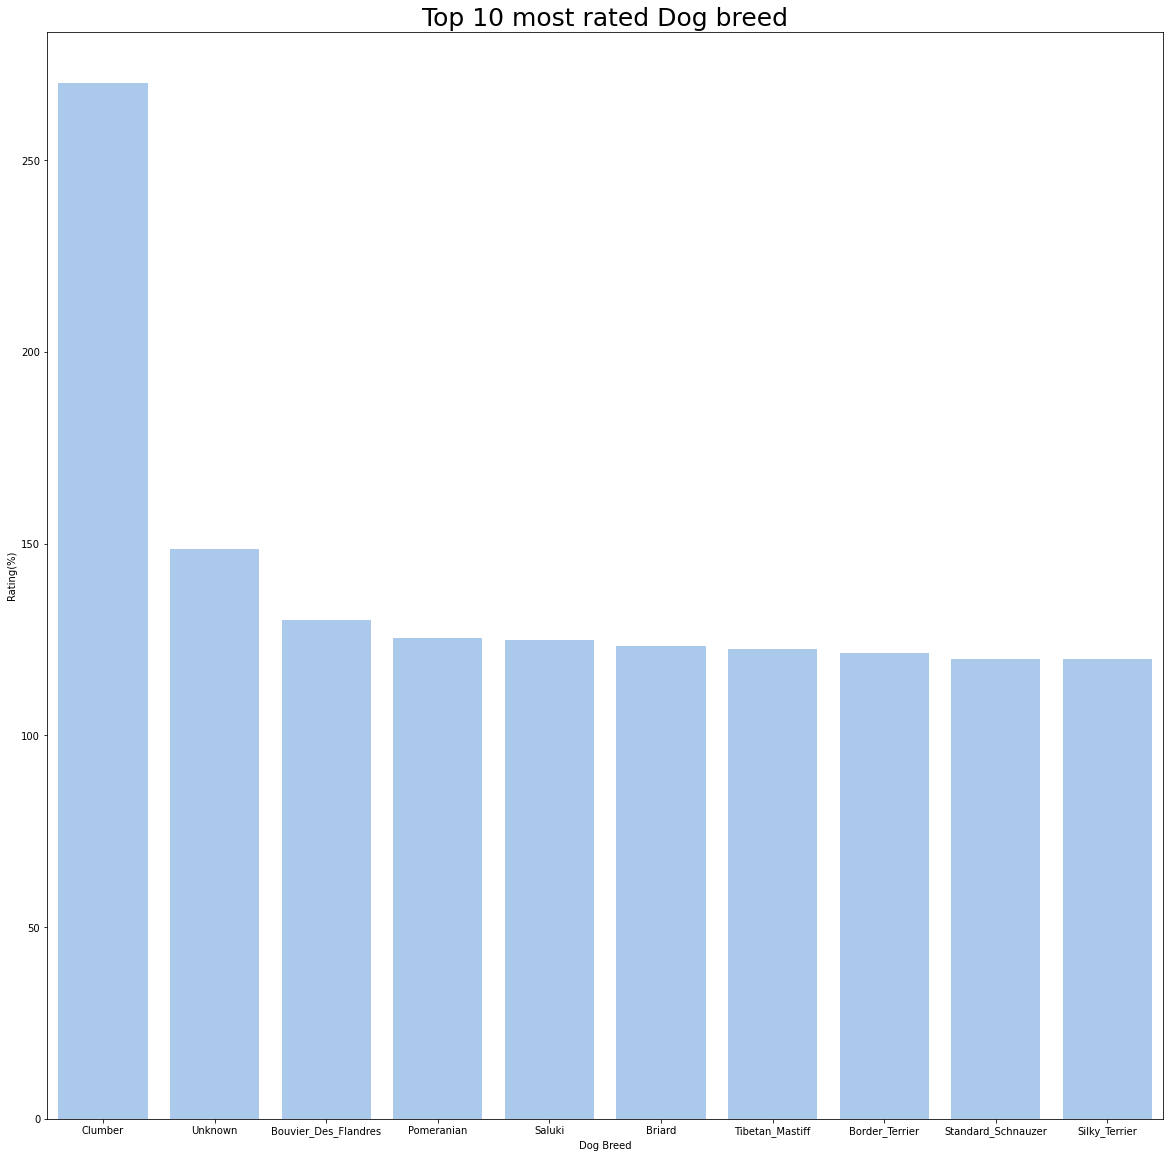

In [183]:
Barplot('breed','rating_percent',top_10,'Top 10 most rated Dog breed','Dog Breed','Rating(%)')

## 3. relationship between favorite_count and retweet_count 

Next, we shall find out the correlation between the likes(favourites) and the retweets on the tweets

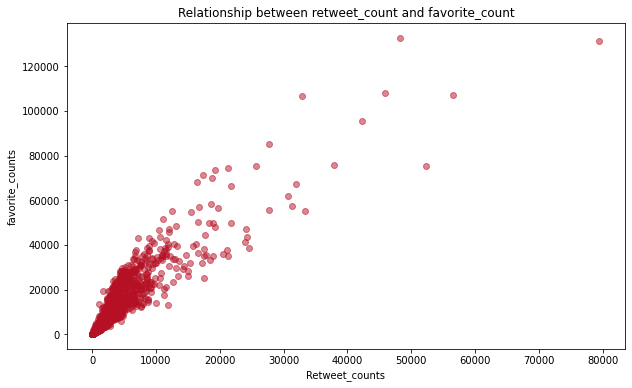

In [184]:
x= final_archive.retweet_count
y= final_archive.favorite_count
plt.figure(figsize=(10,6))
plt.scatter(x,y, color= '#B51024', alpha = 0.5)
plt.title('Relationship between retweet_count and favorite_count', {'fontsize': 12})
plt.xlabel("Retweet_counts")
plt.ylabel("favorite_counts")
plt.show()

**As we can see clearly, there's a positive correlation between the favourites and the retweets**

## 4. monthly trend of interactions with WeRateDogs's posts?

Let's say that the interactions are the sum of the favorites and retweets on each tweet

In [185]:
final_archive['interactions'] = final_archive.retweet_count + final_archive.favorite_count
final_archive.interactions.head()

0     723.0
1     415.0
2     740.0
3    1453.0
4     423.0
Name: interactions, dtype: float64

In [189]:
final_archive.info()
#converting to datetime
final_archive.timestamp = pd.to_datetime(final_archive.timestamp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2092 non-null   int64  
 1   timestamp           2092 non-null   object 
 2   source              2092 non-null   object 
 3   text                2092 non-null   object 
 4   expanded_urls       2092 non-null   object 
 5   rating_numerator    2092 non-null   int64  
 6   rating_denominator  2092 non-null   int64  
 7   name                1403 non-null   object 
 8   favorite_count      2092 non-null   float64
 9   retweet_count       2092 non-null   float64
 10  jpg_url             1969 non-null   object 
 11  dog_type            2092 non-null   object 
 12  breed               2092 non-null   object 
 13  confidence          2092 non-null   float64
 14  rating_percent      2092 non-null   float64
 15  interactions        2092 non-null   float64
dtypes: flo

In [191]:
monthly_tweet_activity = final_archive.groupby(final_archive['timestamp'].dt.to_period('M'))['interactions'].mean()

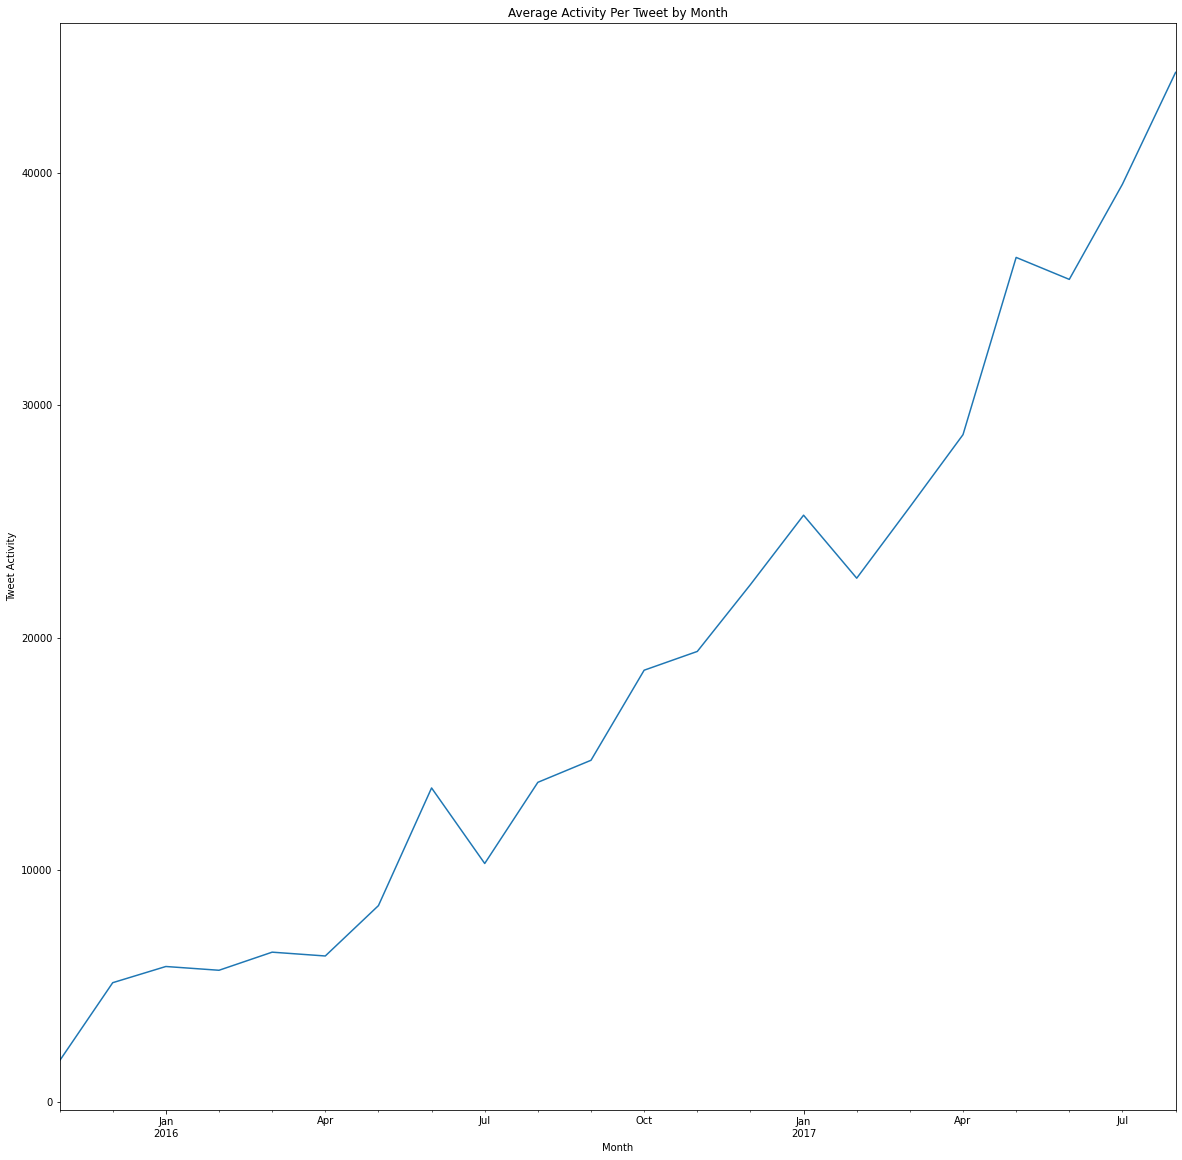

In [192]:
monthly_tweet_activity.plot()
plt.title('Average Activity Per Tweet by Month')
plt.xlabel('Month')
plt.ylabel('Tweet Activity');

The interactions on the page are on an upward trend since the inception of the account 